## Unicorn companies
a visualisation project.

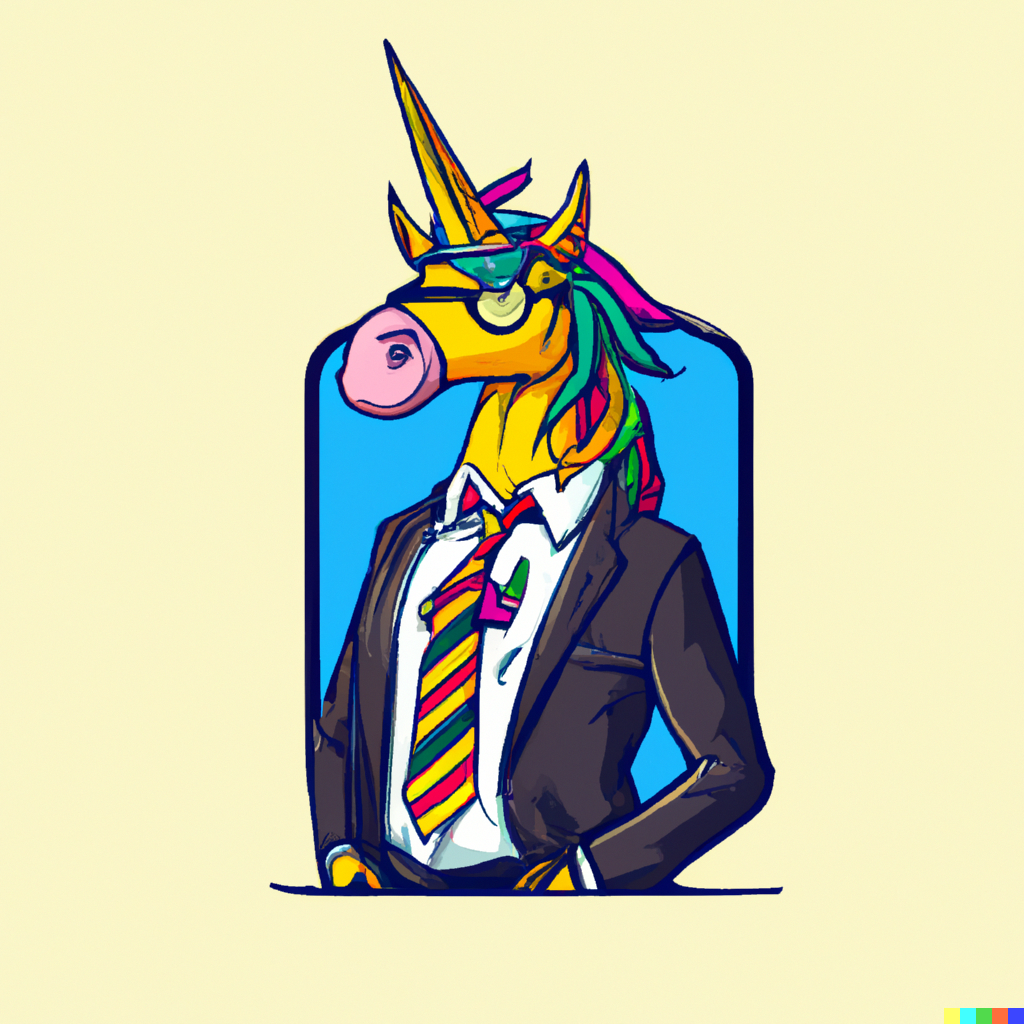

A unicorn company is a privately held business that has a valuation exceeding 1 billion dollars (USD). With a total of 1200 unicorn companies worldwide as of 17 February, these entities are extremely rare, accounting for less than 0.0005% of all existing companies. The name "Unicorn company" is derived from the rarity of such businesses, which are highly sought after by investors due to their high valuation and potential for significant growth.

The emergence of unicorn companies has had a profound impact on the global economy and has forced society to rethink how it perceives business success. These entities have disrupted traditional business models and challenged conventional wisdom on what industries are worth investing in. Aspiring entrepreneurs seeking to establish their own unicorn companies have been compelled to study the blueprint of successful unicorns and draw inspiration from their innovative approaches to doing business.

In this project, data from mavenanalytics.io on unicorn companies will be utilized to gain insights into the world's most successful and influential businesses. The project aims to simplify complex information and provide an accessible, easy-to-understand visualization of unicorn companies and their impact on the global economy. Through this exploration, we hope to gain a deeper understanding of the unique characteristics that define a unicorn company and the factors that contribute to their success.

A microsoft PowerBI dashboard will accompany this notebook for more a more engaging interaction with the dataset.

The first phase of the project would be explore the data. This data is sourced by a third party making it prone to errors in entry of the data, consistency of the data and most importantly, the acuracy of the data. So an Exploratory Data Analysis would prove beneficial. 

#### Imports libraries

In [1]:
#to import the data
import pandas as pd
import numpy as np
#for plotting
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import nltk
from nltk.corpus import stopwords
#filter warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the data
unicorn_companies=pd.read_csv('Unicorn_Companies.csv')

To perfom the EDA, the EDA script or code from https://github.com/honeyzwane/Exploratory-Data-Analysis is utilised since most of the EDA code is repeatitive, why not simply automate it, here the original code for the EDA will be used and not the library so as to ensure everyone is on the same page. (do check out the repo for the EDA, it is public and open to changes)

In [3]:
#A simple code to analyse the dataset

import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

def EDA(data):
    """Perform exploratory data analysis on a given dataset.
    Args:
      data (pandas.DataFrame): The dataset to analyze.
    """
    from IPython.display import display
    display(data.head())
     
    # Print the shape of the dataset
    print(f"Number of rows: {data.shape[0]}")
    print(f"Number of columns: {data.shape[1]}")   

    # Check for missing values
    if data.isnull().values.any():
        # Find the number of missing values for each column
        missing_counts = data.isnull().sum()
        # Calculate the percentage of missing values for each column
        missing_percentages = 100 * missing_counts / len(data)
        # Select only the columns with missing values
        missing_columns = missing_percentages[missing_percentages > 0]
        print(f"Percentage of missing values in each column:")
        print(missing_columns)
    else:
        print("No missing values found")

    # Check for duplicated rows
    duplicates = data[data.duplicated()]
    if duplicates.empty:
        print("No duplicated rows found")
    else:
        duplicate_count = len(duplicates)
        total_count = len(data)
        print(f"{duplicate_count} out of {total_count} rows are duplicated ({100 * duplicate_count / total_count:.2f}%)")

    # Check for outliers
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = ((data < lower_bound) | (data > upper_bound)).sum()
    if outliers.sum() == 0:
        print("No outliers found")
    else:
        print(f"Number of outliers per column:")
        print(outliers)
    
    # Check data types
    data_types = data.dtypes
    print(f"Data types: {data_types}")

    # Check correlations
    correlations = data.corr()
    print("Correlation table:")
    print(correlations)
    
    # Create histograms of numerical columns
    numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
    data[numeric_cols].hist(bins=10, figsize=(20, 15))
    plt.show()

Company Valuation Date Joined                         Industry  \
0  Bytedance     $180B  2017-04-07          Artificial intelligence   
1     SpaceX     $100B  2012-12-01                            Other   
2      SHEIN     $100B  2018-07-03  E-commerce & direct-to-consumer   
3     Stripe      $95B  2014-01-23                          Fintech   
4     Klarna      $46B  2011-12-12                          Fintech   

            City        Country      Continent  Year Founded Funding  \
0        Beijing          China           Asia          2012     $8B   
1      Hawthorne  United States  North America          2002     $7B   
2       Shenzhen          China           Asia          2008     $2B   
3  San Francisco  United States  North America          2010     $2B   
4      Stockholm         Sweden         Europe          2005     $4B   

                                    Select Investors  
0  Sequoia Capital China, SIG Asia Investments, S...  
1  Founders Fund, Draper Fisher Jurvetson, Rothen...  
2  Tiger Global Management, Sequoia Capital China...  
3        Khosla Ventures, LowercaseCapital, capitalG  
4  Institutional Venture Partners, Sequoia Capita...

Number of rows: 1074
Number of columns: 10
Percentage of missing values in each column:
City                1.489758
Select Investors    0.093110
dtype: float64
No duplicated rows found
Number of outliers per column:
City                 0
Company              0
Continent            0
Country              0
Date Joined          0
Funding              0
Industry             0
Select Investors     0
Valuation            0
Year Founded        58
dtype: int64
Data types: Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country             object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object
Correlation table:
              Year Founded
Year Founded           1.0


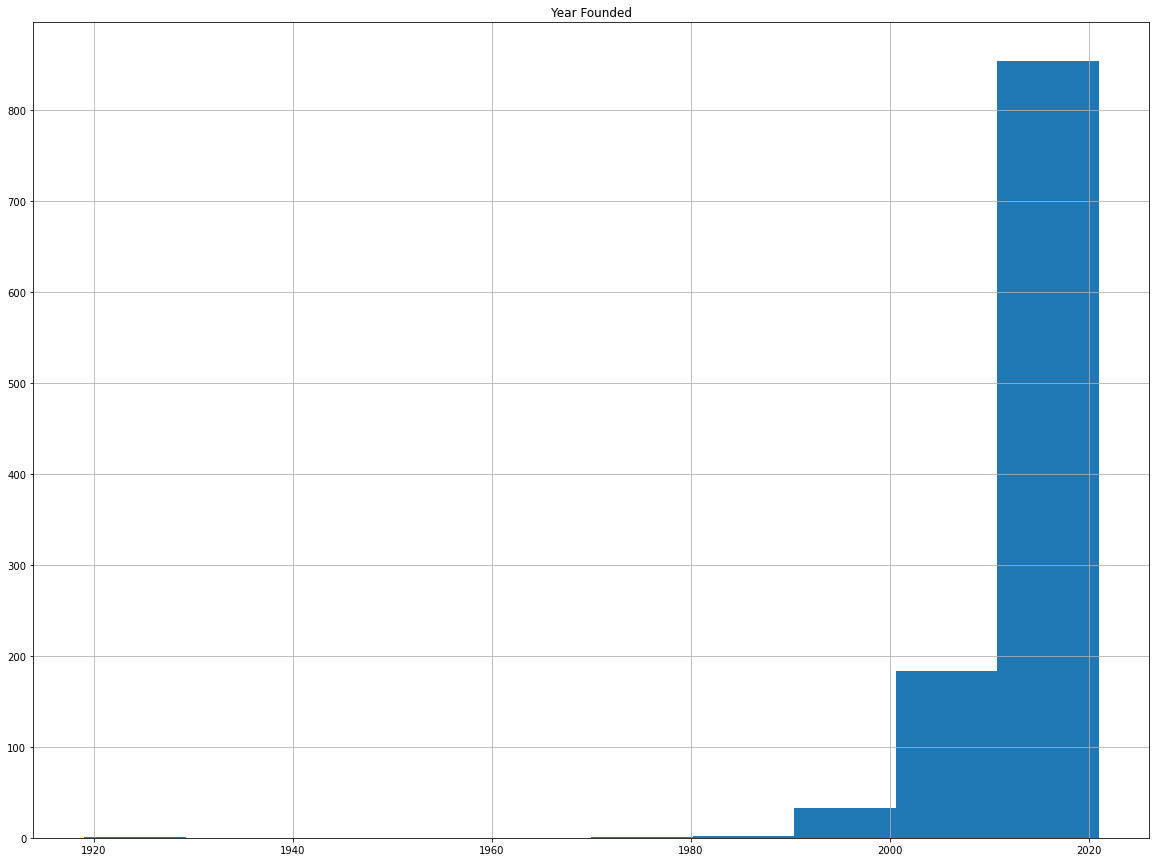

In [4]:
EDA(unicorn_companies)

### Feature engineering

From the above it becomes aparent that a few changes will need to be implemented into the dataset. namely changing the Date Joined, Year Founded, Valuation and Select Investors column names. Having the evaluation and funding column adusted and lastly having Select Investors column separated would prove more beneficial. 

In [5]:
#to make changes to the column names
unicorn_companies.rename(columns = {'Date Joined' : 'Date_Joined'}, inplace = True)
unicorn_companies.rename(columns = {'Valuation ($B)' : 'Valuation'}, inplace = True)
unicorn_companies.rename(columns = {'Select Investors' : 'Select_Investors'}, inplace = True)
unicorn_companies.rename(columns= {'Year Founded': 'year_founded'}, inplace= True)

Moving on to make adjustments to the Valuation and Funding columns 

In [6]:
# Removing "$", "B", "M" and "Unknown" from Funding column
unicorn_companies.Funding = unicorn_companies.Funding.str.replace("$","")
unicorn_companies.Funding = unicorn_companies.Funding.str.replace("B",'0'*9)
unicorn_companies.Funding = unicorn_companies.Funding.str.replace("M",'0'*6)

In [7]:
# Removing "$" and "B" from Valuation column
unicorn_companies.Valuation = unicorn_companies.Valuation.str.replace("$","")
unicorn_companies.Valuation = unicorn_companies.Valuation.str.replace("B",'0'*9)

In [8]:
unicorn_companies.to_csv('unicorn companies1.csv', index=False)

In [9]:
# replace 'Unknown' with NaN in the 'Funding' column
unicorn_companies['Valuation'] = unicorn_companies['Valuation'].replace('Unknown', float('nan'))
# convert the 'Funding' column to float
unicorn_companies['Valuation'] = unicorn_companies['Valuation'].astype(float)
#drop rows with NaN values in the 'Funding' column
unicorn_companies = unicorn_companies.dropna(subset=['Valuation'])

In [10]:
# replace 'Unknown' with NaN in the 'Funding' column
unicorn_companies['Funding'] = unicorn_companies['Funding'].replace('Unknown', float('nan'))
# convert the 'Funding' column to float
unicorn_companies['Funding'] = unicorn_companies['Funding'].astype(float)
#drop rows with NaN values in the 'Funding' column
unicorn_companies = unicorn_companies.dropna(subset=['Funding'])

A column that looks like it can serve a great purpose would be the 'Date_Joined' column. It might prove wise to convert it into a datetime format and separate the year and month out.

In [11]:
#converting the Date_Joined column
date = unicorn_companies.Date_Joined.str.split('-', expand=True)
#separating the month and year
unicorn_companies['year'] = date[0]
unicorn_companies['month'] = date[1]
#converting year and month to numeric types
unicorn_companies.year = pd.to_numeric(unicorn_companies.year)
unicorn_companies.month = pd.to_numeric(unicorn_companies.month)


And for the final part, Exploding the investor column

In [12]:
#firsly split and convert the names into a list
unicorn_companies["Select_Investors"] = unicorn_companies["Select_Investors"].str.split(", ")

In [13]:
unicorn_companies = unicorn_companies.explode("Select_Investors")
unicorn_companies.head()

Company     Valuation Date_Joined                 Industry       City  \
0  Bytedance  1.800000e+11  2017-04-07  Artificial intelligence    Beijing   
0  Bytedance  1.800000e+11  2017-04-07  Artificial intelligence    Beijing   
0  Bytedance  1.800000e+11  2017-04-07  Artificial intelligence    Beijing   
0  Bytedance  1.800000e+11  2017-04-07  Artificial intelligence    Beijing   
1     SpaceX  1.000000e+11  2012-12-01                    Other  Hawthorne   

         Country      Continent  year_founded       Funding  \
0          China           Asia          2012  8.000000e+09   
0          China           Asia          2012  8.000000e+09   
0          China           Asia          2012  8.000000e+09   
0          China           Asia          2012  8.000000e+09   
1  United States  North America          2002  7.000000e+09   

        Select_Investors  year  month  
0  Sequoia Capital China  2017      4  
0   SIG Asia Investments  2017      4  
0             Sina Weibo  2017      4  
0         Softbank Group  2017      4  
1          Founders Fund  2012     12

Now we can progress into the next phase of this project, it is important to note that a Microsoft Power BI dashboard will be included to enhance the overall experience. However, for the purpose of this notebook, we will solely be utilizing Python visuals.

This is done so as to ensure that the project remains accessible to all users, regardless of their technical knowledge or access to specialized software. Despite not incorporating the added functionalities of Power BI, Python's powerful visualization tools will be utilized to create a clear and concise representation of the data.

It is with the hope that this decision to utilize Python visuals will not only enable the data to be more easily digestible for the reader but also serve as a testament to the versatility of the python itself. By showcasing the capabilities of Python's visualization tools, we aim to demonstrate the immense potential of this popular programming language and its relevance in modern-day data analysis.

## Visualisation of relationships 

There are always basics when it comes to visualisation tools. Namely, Scatterplot, boxplot, piecharts and so forth. these visualisation tools are commonly used in the world of data analytics because they are extremly powerful tools, easy to construct and easy for the readers to interpret. With this said, the aim of this project is to take it a step further than the common basic visuals. let us explore what is possible with python.

firstly we will look at a bar chart to display the number of unicorn companies per continent.

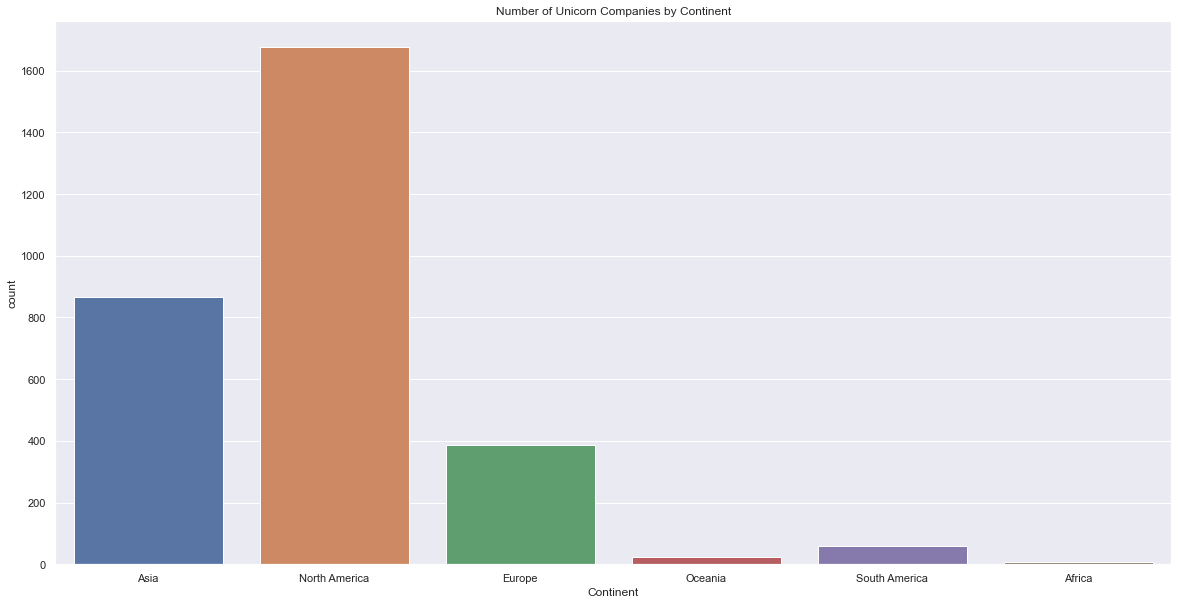

In [26]:
#A simple barchart showing which continents have unicorn companies.
import seaborn as sns

sns.countplot(x='Continent', data=unicorn_companies)
plt.title('Number of Unicorn Companies by Continent')
plt.show()

It is this easy to create nature of barcharts that makes them so famous. From above, seeing that North America, Asia and Europe have the highest number of Unicorn Companies. One could move to see which contries and cities have the highest concetration of these marvels. To visualise this, a Chloropeth graph was plotted. 
A chloropleth graph is a graph that maps out by displaying shaded area representing the magnitude of an attribute.

There are this is a visual not commonly used because it is simply less popular. However it can convey the message across much better and more visually appealing when compared to others.

Moving on, as simple and as popular as they are. Linechart are amazing tools, below a linechart showing the valuation of each company.

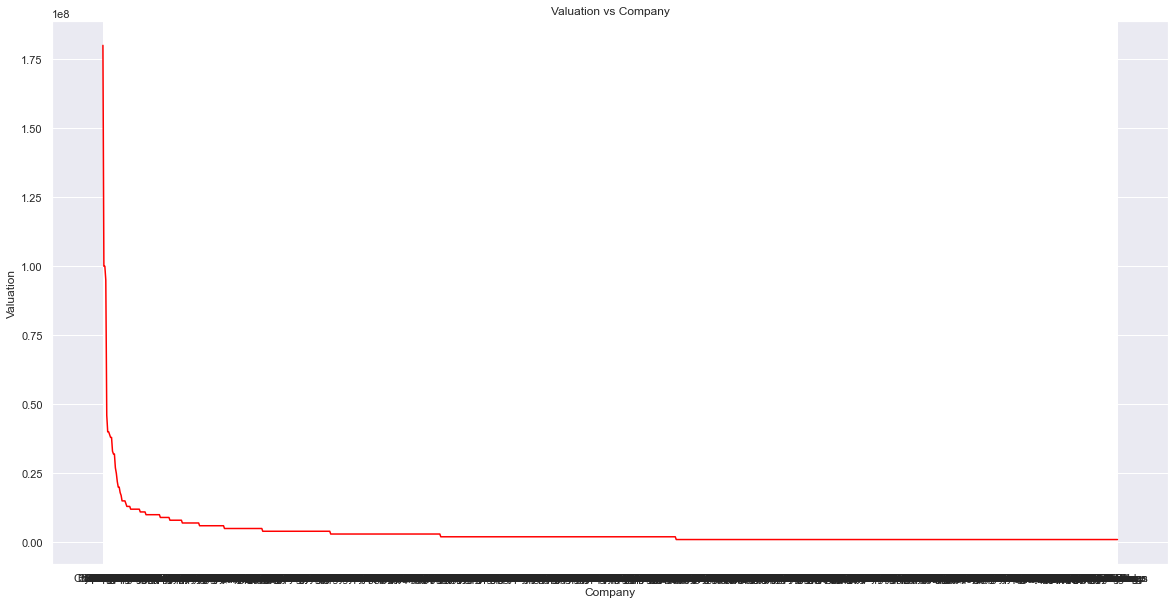

In [27]:
# Create a scatter plot of Valuation vs Funding
plt.plot(unicorn_companies['Company'], unicorn_companies['Valuation'], alpha=1.0,color='red',   
         linewidth=1.5)
plt.xlabel('Company')
plt.ylabel('Valuation')
plt.title('Valuation vs Company')
plt.show()

It becomes apparent that there are many companies in our data that found on the Billion dollar evaluation. And while this is commendable. there are a few companies that are uncommong amongst the uncommon, companies with valutions in double digits become rare the higher you go. to get a figure of how many companies have valutions above 10 billion and above, a simple code can achieve this, but since it a visualisation project, why not show this visually?

below is a donut chart to display the company valuations grouped from single digit to double digit and triple digits. granted it is in the billions of dollar neighbourhood. 

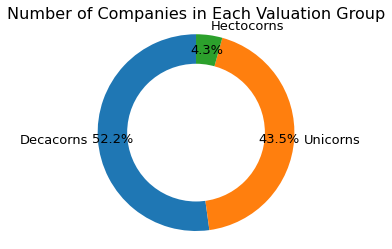

In [16]:
# create bins for valuation groups
bins = [0, 1e9, 1e10, 1e11]
labels = ['Unicorns', 'Decacorns', 'Hectocorns']
unicorn_companies['valuation_group'] = pd.cut(unicorn_companies['Valuation'], bins=bins, labels=labels)
# count number of companies in each group
group_counts = unicorn_companies['valuation_group'].value_counts()
# plot donut chart
fig, ax = plt.subplots()
ax.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, textprops={'fontsize': 13})
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.axis('equal')
plt.title('Number of Companies in Each Valuation Group', fontsize=16)
plt.show()

A donut chart is a beautiful take on the pie chart. it still retains the usefulness and easy to read nature of pie charts but provides a fresh aesthetic on displaying data. Still, it is a fairly common visual. 

from the about donut plot, it would seem that amazingly 52% of the companies are found to have valuations between 10 to 99.9 billion dollars, termed decacorns. are companies with valuations above 10 billion and only 4.3% of the companies have exceeded the 100 billion dollar mark. making them hectocorns (companies valued above 100 billion).

Having understood that there are over 1000 unicorn companies. Having over 50% of them valued above 10 billion dollars is amazing. truly a feat above simple comprehension. Below the visual for how any companies join the coverted club of unicorn companies is displayed in a simple line graph

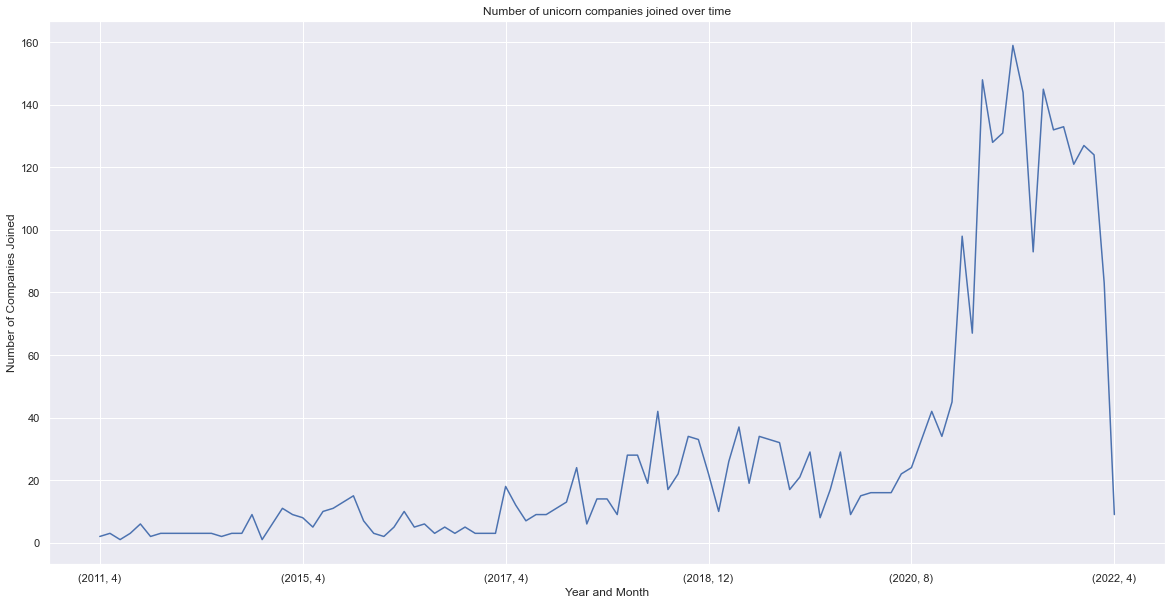

In [28]:
# Group the data by year and month and count the number of companies joined each month
join_counts = unicorn_companies.groupby(['year', 'month'])['Company'].count()

# Create a line chart of number of unicorn companies joined over time
join_counts.plot(kind='line')
plt.xlabel('Year and Month')
plt.ylabel('Number of Companies Joined')
plt.title('Number of unicorn companies joined over time')
plt.show()

It appears that number of unicorn companies peaked from 2020 through to 2022 where it started to decline greatly. This sharp increase is suspecious given that these are billion dollar valuations. To take a closer look at this, one might look at how long does it take for the average unicorn company to be dubbed into the club from its inception.

In [18]:
unicorn_companies['Duration_to_become_Unicorn'] = unicorn_companies['year'] - unicorn_companies['year_founded']

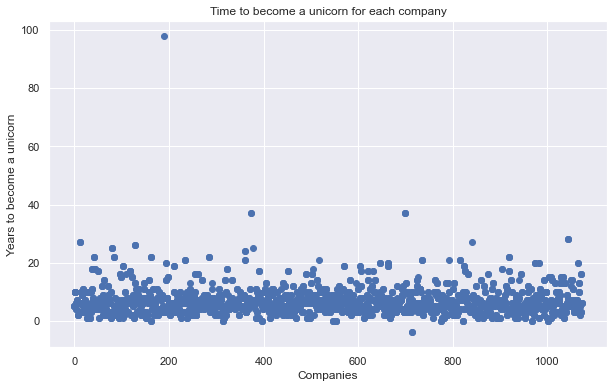

In [29]:
x = unicorn_companies.index
y = unicorn_companies['Duration_to_become_Unicorn']
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(x, y)
plt.xlabel('Companies')
plt.ylabel('Years to become a unicorn')
plt.title('Time to become a unicorn for each company')
plt.show()

A lot of the companies take between the 0 to about 15 years range. This does not provide with a more acurate figure to see how long it takes to become a unicorn company, however there is a rough range. To get the average years it takes to become one, a simple code to get the mean would suffice.

In [20]:
unicorn_companies['Duration_to_become_Unicorn'].mean()

6.851042701092354

Seeing that it takes about 7 years to become a bahemoth of industry like unicorn companies. That is a rather short time to achive such great heights, it is only natural to ask if these companies are even profitable.  
Another powerful tool that can be used to display this, is a pie chart. Used to show the companies that are profitable, at break even point and those at a loss.

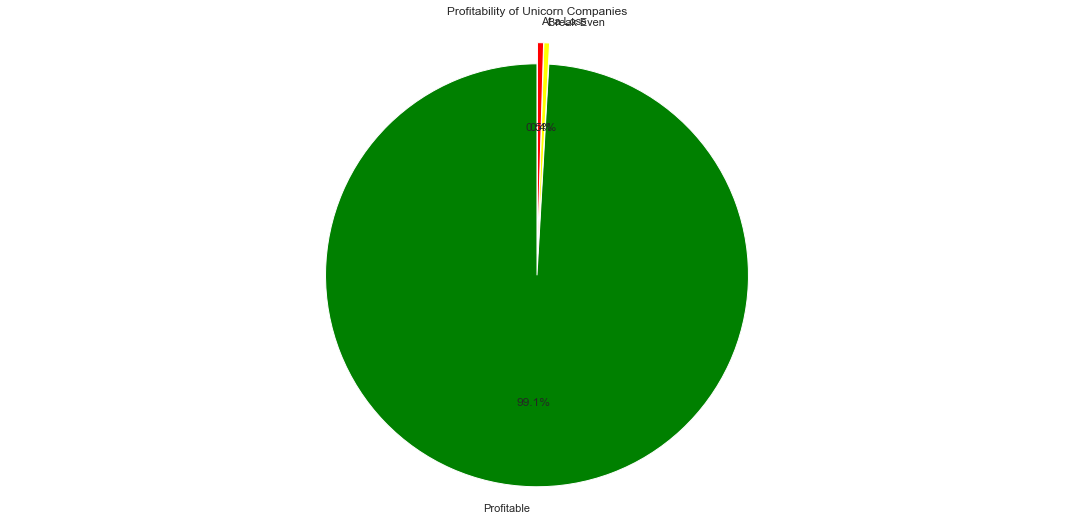

In [37]:
# Convert Valuation to billions and Funding to billions
unicorn_companies['Valuation'] = unicorn_companies['Valuation'] / 1000
unicorn_companies['Funding'] = unicorn_companies['Funding'] / 1000 if unicorn_companies['Funding'].max() > 1000 else unicorn_companies['Funding'] / 1000 / 1000

# Calculate the percentage of companies that are profitable, at break even, and at a loss
profitable = sum(unicorn_companies['Valuation'] > unicorn_companies['Funding']) / len(unicorn_companies) * 100
break_even = sum(unicorn_companies['Valuation'] == unicorn_companies['Funding']) / len(unicorn_companies) * 100
at_loss = sum(unicorn_companies['Valuation'] < unicorn_companies['Funding']) / len(unicorn_companies) * 100

# Create a pie chart
sns.set(rc={'figure.figsize':(19,9)})
labels = ['Profitable', 'Break Even', 'At a Loss']
sizes = [profitable, break_even, at_loss]
colors = ['green', 'yellow', 'red']
explode = (0.05, 0.05, 0.05)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Profitability of Unicorn Companies')
plt.axis('equal')
plt.show()

In [22]:
profitable

99.10625620655412

An alarming 99.1% of the companies appear to be profitable. This is statistically impossible. However one would have to consider how the number came about. Here the profitability is calculated using the initial investment and simply subtracting it from the evaluation. It does not take into account the day to day expenses a company will and does face. Only the profitability from the investors side. This already posses a problem because according to Business insider India, only about 17% of the worlds unicorns are profitable. This figure is more believeable than to say almost all of them are profitable.

But, if only about about 17% are profitable, who keeps investing into these compananies? Let us see which investors have invested the most or at least appear to be an investor in the most number of companies.

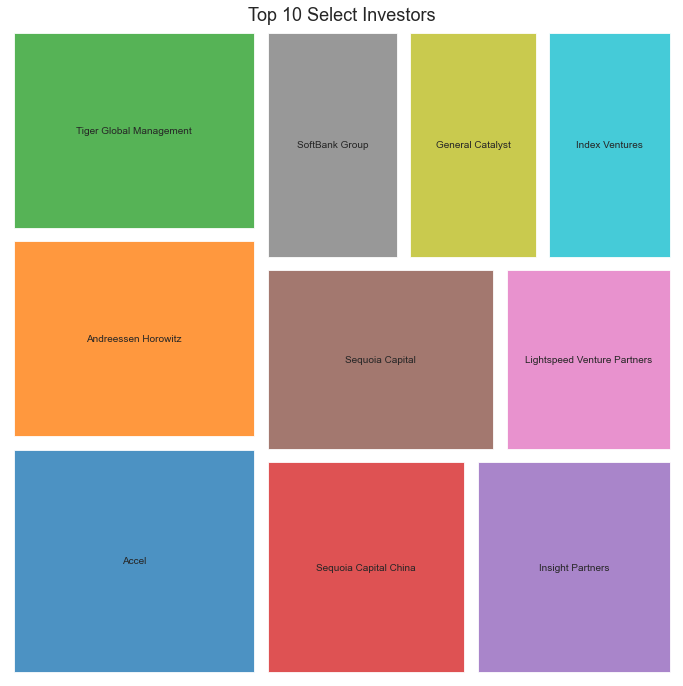

In [33]:
import squarify

# Get the top 10 most frequent select_investors
top_investors = unicorn_companies['Select_Investors'].value_counts().head(10)
# Create a dictionary to store the count of each investor
investor_counts = {}
for investor in top_investors.index:
    investor_counts[investor] = top_investors[investor]
# Create a list of colors for the treemap
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# Plot the treemap
plt.figure(figsize=(12, 12))
squarify.plot(sizes=investor_counts.values(), label=investor_counts.keys(),
              color=colors, alpha=.8, pad=True, text_kwargs={'fontsize':10})
plt.axis('off')
plt.title('Top 10 Select Investors', fontsize=18)
plt.show()

Andreessen Horowitz, Tiger Global Management and Accel appear to be the 3 biggest investors from all the investors. More information would have to be acquired if someone wanted to check for these investors profitability in the long term given their exposure in these companies. 

But also which industries are producing the most Unicorn companies? it could help understand the reasoning behind their support. 
Barcharts are useful tools in this regard. A good thing is that the barcharts have many variations, one of which is the lolipop chart which serves the same purpose as a barchart but it has a uniqueness to it not seen by many.

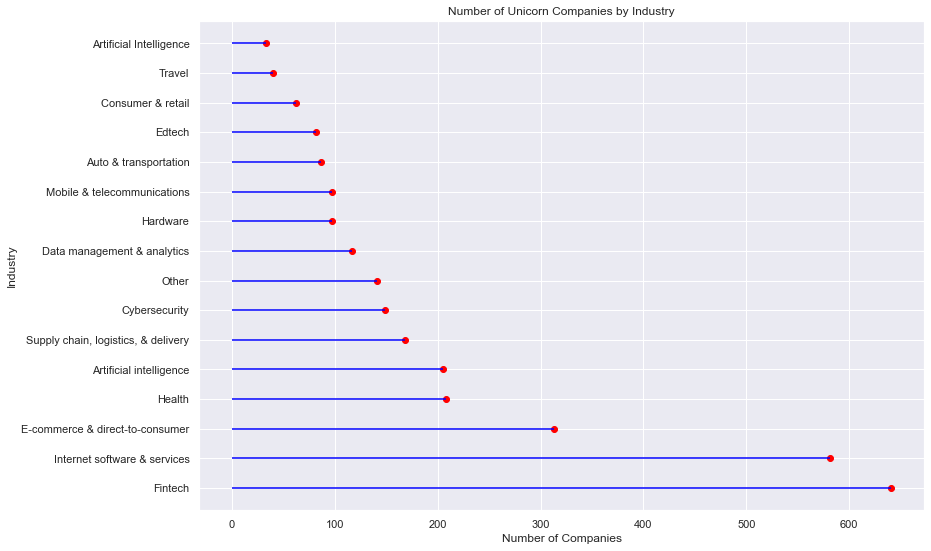

In [36]:
# Count the number of companies in each industry
industry_counts = unicorn_companies['Industry'].value_counts()
# Plot the data as a lollipop chart
plt.figure(figsize=(13,9))
plt.hlines(y=industry_counts.index, xmin=0, xmax=industry_counts.values, color='blue')
plt.scatter(x=industry_counts.values, y=industry_counts.index, color='red')
plt.xlabel('Number of Companies')
plt.ylabel('Industry')
plt.title('Number of Unicorn Companies by Industry')
plt.show()

Having seen how most of the companies are not yet profitable but still getting funding from investor and which are the top industries that have the most unicorn companies. We could also go on to visualise the top 15 companies based on the size of their valuations.

In [25]:
import plotly.express as px

# select top 15 companies by valuation
top_15 = unicorn_companies.nlargest(15, "Valuation")

# plot bubble chart
fig = px.scatter(top_15, x="Country", y="Industry", size="Valuation", color="Continent",
                 hover_name="Company", size_max=60)
fig.show()